![Image of T-Series](https://yt3.ggpht.com/a/AGF-l7_pAUMBrwUj9lIAPzwKL1MKmb9q875ck73n2Q=s288-c-k-c0xffffffff-no-rj-mo)

As an ardent consumer of Indian music, particularly Bollywood music, I was amazed at the popularity of one specific music label company which enjoys majority of the market share in India: T-Series. When I researched further, I found that T-Series also has the world's biggest youtube channel.

In this notebook, I extract and explore the company's data using youtube APIs.

https://socialblade.com/youtube/top/100/mostsubscribed \
https://www.bloomberg.com/news/features/2019-11-14/how-t-series-beat-pewdiepie-to-be-world-s-biggest-youtube-channel

In [1]:
#import libraries
import json
from pandas.io.json import json_normalize
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import config
import warnings
warnings.filterwarnings("ignore")
#!pip install google-api-python-client
from googleapiclient.discovery import build

In [2]:
#get stats on the channel
api_key = config.YOUTUBE_API_KEY
youtube = build('youtube', 'v3', developerKey = api_key)

req = youtube.channels().list(part = "contentDetails,statistics,localizations,snippet,topicDetails", forUsername = 'tseries')
res = req.execute()
res

{'kind': 'youtube#channelListResponse',
 'etag': '"p4VTdlkQv3HQeTEaXgvLePAydmU/k5pWPKxPGYoEXbfzkD_q-zGmxj0"',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': '"p4VTdlkQv3HQeTEaXgvLePAydmU/zTzeDaiYBtlMcYnvxub29vsmcok"',
   'id': 'UCq-Fj5jknLsUf-MWSy4_brA',
   'snippet': {'title': 'T-Series',
    'description': '"Music can change the world". T-Series is India\'s largest Music Label & Movie Studio, believes in bringing world close together through its music.\nT-Series is associated with music industry from past three decades, having ample catalogue of music comprising plenty of languages that covers the length & breadth of India. We believe after silence, nearest to expressing the inexpressible is Music. So, all the music lovers who believe in magic of music come join us and live the magic of music with T-Series.',
    'customUrl': 'tseriesmusic',
    'publishedAt': '2006-03-13T14:27:05.000Z',
    'thumbnails': {'default': {'url': '

About the channel:
* It is a music label company based in India
* The channel was started in March 2006
* Categories: Entertainment, Film
* Subscribers: 12bM
* Views: 94B+
* Videos: 14K+

In [3]:
#get a list of videos the channel has published until date
def get_channel_videos(channel_id):
    res = youtube.channels().list(id=channel_id, 
                                  part='contentDetails').execute()
    playlist_id = res['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    videos = []
    next_page_token = None
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id, 
                                           part='snippet', 
                                           maxResults=50,
                                           pageToken=next_page_token).execute()
        videos += res['items']
        next_page_token = res.get('nextPageToken')
        if next_page_token is None:
            break
    return videos
videos = get_channel_videos('UCq-Fj5jknLsUf-MWSy4_brA')

### Published Time
- T-Series published about 120 videos per month last year
- Friday is when most number of videos are published and Sunday is when least number of videos are published. This makes sense because Friday is the start of the weekend. 
- Videos are mostly published between 10AM and 1PM. 

In [4]:
#extract variables on when the videos are published
videos_df = json_normalize(videos)
videos_df = videos_df[['snippet.resourceId.videoId', 'snippet.publishedAt', 'snippet.title']]
videos_df.columns = ['Id', 'PublishedAt', 'VideoTitle']
videos_df['PublishedAt'] = pd.to_datetime(videos_df['PublishedAt'].str.strip())
videos_df['PublishedYear'], videos_df['PublishedMonth'], videos_df['PublishedDay'], videos_df['PublishedWeekday'], videos_df['PublishedHour'] = videos_df['PublishedAt'].dt.year, videos_df['PublishedAt'].dt.month, videos_df['PublishedAt'].dt.day, videos_df['PublishedAt'].dt.day_name(), videos_df['PublishedAt'].dt.hour
videos_df.head()

,Id,PublishedAt,VideoTitle,PublishedYear,PublishedMonth,PublishedDay,PublishedWeekday,PublishedHour
0,S_gMjP0Rv1Q,2020-01-07 09:08:02+00:00,Creating The Universe Of Tanhaji: The Unsung W...,2020,1,7,Tuesday,9
1,s1n6oea7U9Q,2020-01-07 06:15:47+00:00,Creating The Visual Effects | Tanhaji: The Uns...,2020,1,7,Tuesday,6
2,jKQ6rjVZPPc,2020-01-07 07:00:11+00:00,"LYRICAL: Garmi | Street Dancer 3D | Varun D, N...",2020,1,7,Tuesday,7
3,MU-uE1BlAzo,2020-01-07 04:30:00+00:00,Lamborghini Full Audio | Jai Mummy Di l Sunny ...,2020,1,7,Tuesday,4
4,ZcNrkfwS3z0,2020-01-07 03:00:07+00:00,Full Audio: MUMMY NU PASAND | Jai Mummy Di |Su...,2020,1,7,Tuesday,3


In [5]:
videos_df.Id.groupby(videos_df.PublishedYear).count().median()

1039.0

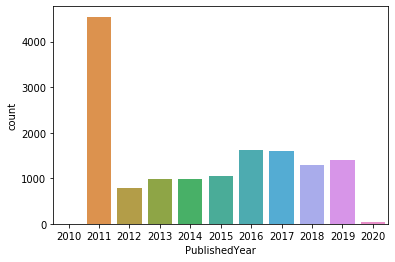

In [6]:
sns.countplot(x='PublishedYear', data=videos_df)
plt.show()

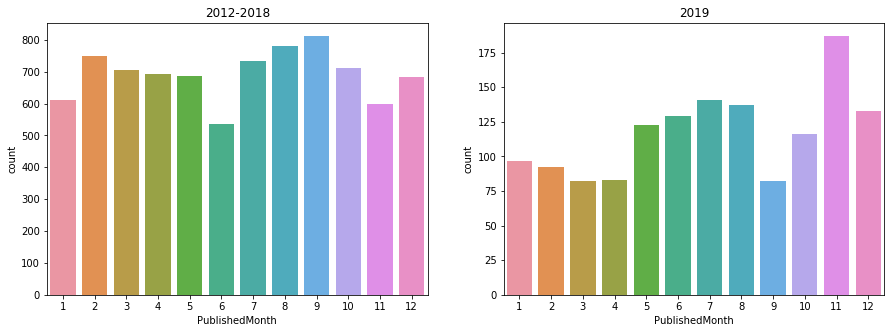

In [7]:
#I will exclude years < 2012
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='PublishedMonth', data=videos_df[(videos_df.PublishedYear > 2011) & (videos_df.PublishedYear < 2019)], ax=ax[0])
sns.countplot(x='PublishedMonth', data=videos_df[videos_df.PublishedYear == 2019], ax=ax[1])
ax[0].set_title('2012-2018')
ax[1].set_title('2019')
fig.show()

In [8]:
videos_df[videos_df.PublishedYear == 2019].Id.groupby(videos_df.PublishedMonth).count().median()

119.5

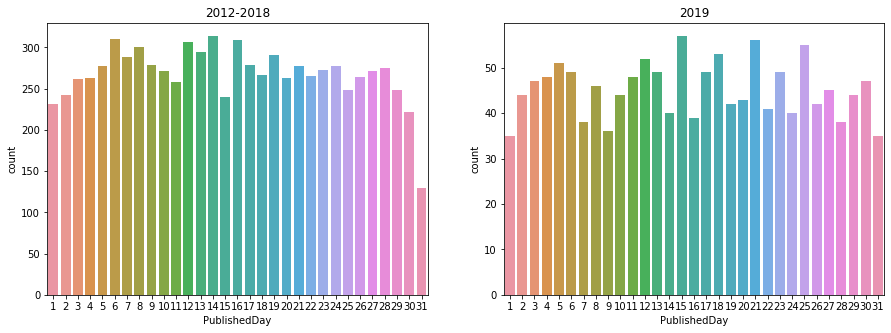

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='PublishedDay', data=videos_df[(videos_df.PublishedYear > 2011) & (videos_df.PublishedYear < 2019)], ax=ax[0])
sns.countplot(x='PublishedDay', data=videos_df[videos_df.PublishedYear == 2019], ax=ax[1])
ax[0].set_title('2012-2018')
ax[1].set_title('2019')
fig.show()

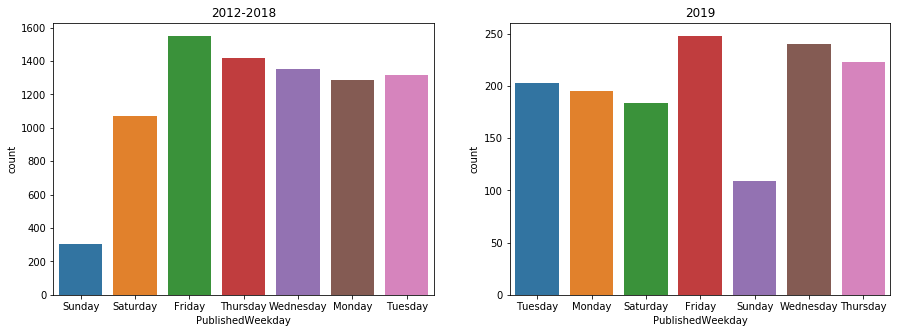

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='PublishedWeekday', data=videos_df[(videos_df.PublishedYear > 2011) & (videos_df.PublishedYear < 2019)], ax=ax[0])
sns.countplot(x='PublishedWeekday', data=videos_df[videos_df.PublishedYear == 2019], ax=ax[1])
ax[0].set_title('2012-2018')
ax[1].set_title('2019')
fig.show()

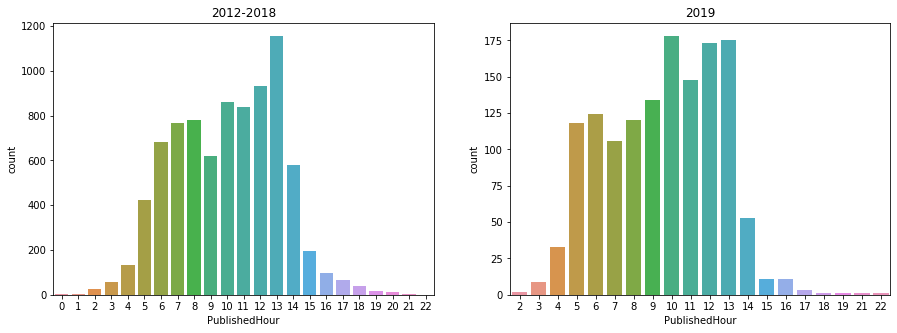

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='PublishedHour', data=videos_df[(videos_df.PublishedYear > 2011) & (videos_df.PublishedYear < 2019)], ax=ax[0])
sns.countplot(x='PublishedHour', data=videos_df[videos_df.PublishedYear == 2019], ax=ax[1])
ax[0].set_title('2012-2018')
ax[1].set_title('2019')
fig.show()

### Video Titles
- For each movie, there seems to be a stream of videos published, which would have overlapping content. From the titles we can see there are dialogue, promo, teaser, audio, lyrical, and making videos for each movie. 

- Movies Kabir Singh and Bharat seem to have the most prominent content published in 2019.

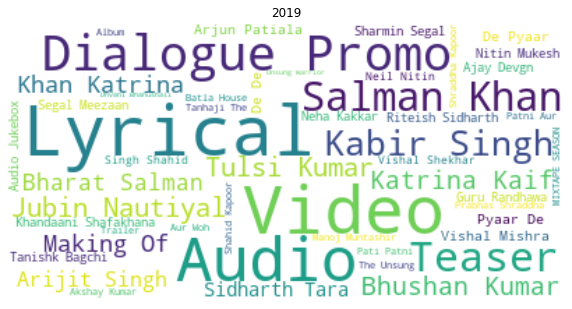

In [26]:
#!pip install wordcloud
from wordcloud import WordCloud
text = " ".join(title for title in videos_df[videos_df.PublishedYear==2019].VideoTitle)
wordcloud = WordCloud(max_font_size=50, max_words=50,background_color="white", stopwords = ['Song', 'Full', 'Series']).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("2019")
plt.show()

### Video Stats
- Guru Randhawa's "High Rated Gabru" is the most viewed video on the channel with close to a billion views.
- "Vaaste" is the most liked and "Aankh Marey" is the most dislliked song - both of which are among the most viewed. 
- Singers and music directors that seem to be raking in the big money for the channel: Guru Randhawa, Tanishk Bagchi, Neha Kakkar, Dhvani Bhanushali, Yo Yo Honey Singh and Jassi Gill.
- One cannot conclude what content is disliked based on the number of dislikes because it's the same content that is liked and viewed the most.

In [13]:
def get_video_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
        
    return stats
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))
stats = get_video_stats(video_ids)
len(stats)

14278

In [14]:
stats[0]

{'kind': 'youtube#video',
 'etag': '"p4VTdlkQv3HQeTEaXgvLePAydmU/K7uuuIcubu0u8UL8FN5eCvMdJLY"',
 'id': 'S_gMjP0Rv1Q',
 'statistics': {'viewCount': '217550',
  'likeCount': '8030',
  'dislikeCount': '353',
  'favoriteCount': '0',
  'commentCount': '493'}}

In [15]:
video_stats = json_normalize(stats)
video_stats = video_stats[['id', 'statistics.commentCount', 'statistics.dislikeCount', 'statistics.likeCount', 'statistics.viewCount']]
video_stats.columns = ['Id', 'Comments', 'Dislikes', 'Likes', 'Views']

In [16]:
videos_df = pd.merge(videos_df, video_stats, on='Id')
videos_df.head()

,Id,PublishedAt,VideoTitle,PublishedYear,PublishedMonth,PublishedDay,PublishedWeekday,PublishedHour,Comments,Dislikes,Likes,Views
0,S_gMjP0Rv1Q,2020-01-07 09:08:02+00:00,Creating The Universe Of Tanhaji: The Unsung W...,2020,1,7,Tuesday,9,493,353,8030,217550
1,s1n6oea7U9Q,2020-01-07 06:15:47+00:00,Creating The Visual Effects | Tanhaji: The Uns...,2020,1,7,Tuesday,6,172,84,2359,51393
2,jKQ6rjVZPPc,2020-01-07 07:00:11+00:00,"LYRICAL: Garmi | Street Dancer 3D | Varun D, N...",2020,1,7,Tuesday,7,401,573,9711,393052
3,MU-uE1BlAzo,2020-01-07 04:30:00+00:00,Lamborghini Full Audio | Jai Mummy Di l Sunny ...,2020,1,7,Tuesday,4,241,346,2045,113473
4,ZcNrkfwS3z0,2020-01-07 03:00:07+00:00,Full Audio: MUMMY NU PASAND | Jai Mummy Di |Su...,2020,1,7,Tuesday,3,495,470,7102,263952


In [17]:
videos_df.isnull().sum()

Id                   0
PublishedAt          0
VideoTitle           0
PublishedYear        0
PublishedMonth       0
PublishedDay         0
PublishedWeekday     0
PublishedHour        0
Comments            18
Dislikes             9
Likes                9
Views                0
dtype: int64

In [18]:
for col in ['Comments', 'Dislikes', 'Likes', 'Views']:
    videos_df[col] = videos_df[col].astype(float)

In [19]:
videos_df[['VideoTitle', 'Views']].sort_values(by ='Views', ascending=False).head(n=10)

,VideoTitle,Views
3541,Guru Randhawa: High Rated Gabru Official Song ...,863664306.0
2777,Guru Randhawa: Lahore (Official Video) Bhushan...,811659683.0
1513,"SIMMBA: Aankh Marey Lyrical | Ranveer Singh, S...",715225270.0
1538,"SIMMBA: Aankh Marey | Ranveer Singh, Sara Ali ...",689097368.0
2110,DILBAR Lyrical | Satyameva Jayate |John Abraha...,677558173.0
1140,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",667023123.0
4201,"Badri Ki Dulhania (Title Track) Varun, Alia, T...",630360034.0
5346,"Cham Cham Full Video | BAAGHI | Tiger Shroff, ...",619091880.0
1710,Official Video: Nikle Currant Song | Jassi Gil...,606040401.0
3942,Cheez Badi Full Video | Machine | Mustafa & K...,604714084.0


In [20]:
videos_df[['VideoTitle', 'Likes']].sort_values(by ='Likes', ascending=False).head(n=10)

,VideoTitle,Likes
1140,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",5860091.0
2777,Guru Randhawa: Lahore (Official Video) Bhushan...,3855969.0
584,"Arijit Singh: Pachtaoge | Vicky Kaushal, Nora ...",3774153.0
3541,Guru Randhawa: High Rated Gabru Official Song ...,3604197.0
1538,"SIMMBA: Aankh Marey | Ranveer Singh, Sara Ali ...",3256489.0
1470,Yo Yo Honey Singh: MAKHNA Video Song | Neha Ka...,3138996.0
1558,Leja Re | Dhvani Bhanushali | Tanishk Bagchi ...,3096526.0
1710,Official Video: Nikle Currant Song | Jassi Gil...,2951943.0
938,Millind Gaba Zindagi Di Paudi | Bhushan Kumar ...,2671770.0
1412,She Don't Know: Millind Gaba Song | Shabby | N...,2554267.0


In [21]:
videos_df[['VideoTitle', 'Dislikes']].sort_values(by ='Dislikes', ascending=False).head(n=10)

,VideoTitle,Dislikes
1538,"SIMMBA: Aankh Marey | Ranveer Singh, Sara Ali ...",576895.0
1513,"SIMMBA: Aankh Marey Lyrical | Ranveer Singh, S...",507451.0
2777,Guru Randhawa: Lahore (Official Video) Bhushan...,472524.0
1140,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",402224.0
3541,Guru Randhawa: High Rated Gabru Official Song ...,371996.0
1182,PM Narendra Modi | Official Trailer | Vivek Ob...,359677.0
2110,DILBAR Lyrical | Satyameva Jayate |John Abraha...,337358.0
5346,"Cham Cham Full Video | BAAGHI | Tiger Shroff, ...",304083.0
11349,Bum Bum Bole (Full Song) Film - Taare Zameen P...,299188.0
4201,"Badri Ki Dulhania (Title Track) Varun, Alia, T...",282601.0


In [22]:
videos_df[['VideoTitle', 'Comments']].sort_values(by ='Comments', ascending=False).head(n=10)

,VideoTitle,Comments
1470,Yo Yo Honey Singh: MAKHNA Video Song | Neha Ka...,349212.0
2777,Guru Randhawa: Lahore (Official Video) Bhushan...,243330.0
1140,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",193025.0
3541,Guru Randhawa: High Rated Gabru Official Song ...,183673.0
2162,Guru Randhawa: MADE IN INDIA | Bhushan Kumar |...,168748.0
1538,"SIMMBA: Aankh Marey | Ranveer Singh, Sara Ali ...",149253.0
1710,Official Video: Nikle Currant Song | Jassi Gil...,149161.0
1182,PM Narendra Modi | Official Trailer | Vivek Ob...,140728.0
716,Yo Yo Honey Singh: Gur Nalo Ishq Mitha (The YO...,136807.0
1122,SLOWLY SLOWLY | Guru Randhawa ft. Pitbull | Bh...,136687.0
